In [22]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
%matplotlib notebook



<IPython.core.display.Javascript object>


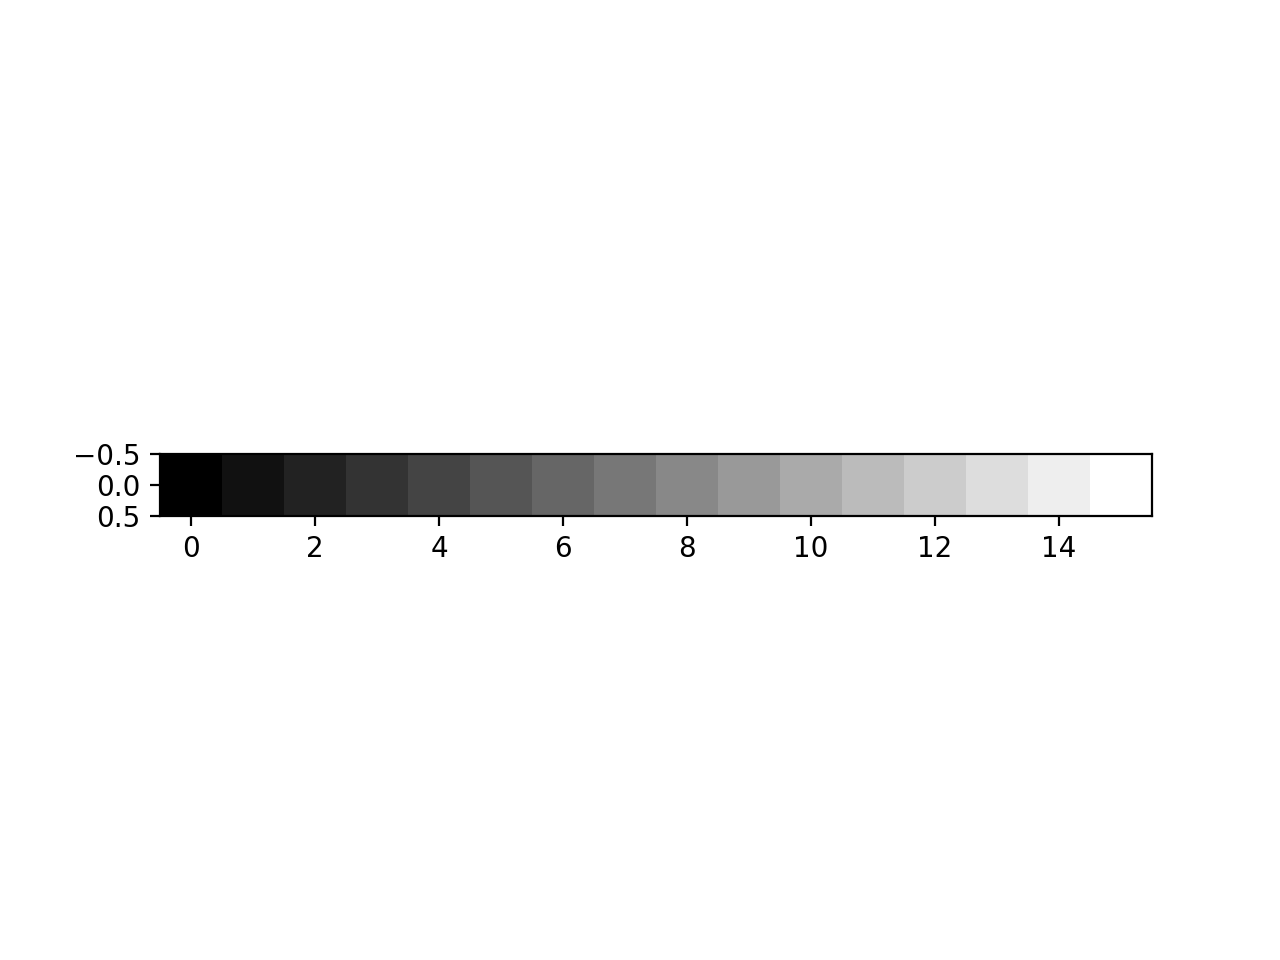

In [23]:
image = [np.linspace(0, 1.0, 16)]

plt.imshow(image, cmap='gray', vmin=0, vmax=1.0)

In [41]:
def biggest_sum_sliding_window(arr, length):
    iters = len(arr) - length + 1
    output = -inf
    curr = -inf
    for i in range(iters):
        ml = i
        mr = i + length
        if curr == -inf:
            curr = sum(arr[ml:mr])
        else:
            curr -= arr[ml - 1]
            curr += arr[mr - 1]
        output = max(curr, output)
    return output

def biggest_sum_brute_force(arr, length):
    iters = len(arr) - length + 1
    output = -inf
    curr = -inf
    for i in range(iters):
        ml = i
        mr = i + length
        curr = sum(arr[ml:mr])
        output = max(curr, output)
    return output

def biggest_sum_pandas(arr, length):
    return pd.Series(arr).rolling(length).sum().dropna().max()

            

In [47]:
import time

def measure(action):
    start_time = time.time()
    action()
    print("--- %s seconds ---" % (time.time() - start_time))
    
c = 5000000
arr = np.linspace(1, c, c)

measure(lambda: print(biggest_sum_sliding_window(arr, 5)))
measure(lambda: print(biggest_sum_brute_force(arr, 5)))
measure(lambda: print(biggest_sum_pandas(arr, 5)))

24999990.0
--- 1.7392418384552002 seconds ---
24999990.0
--- 3.893781900405884 seconds ---
24999990.0
--- 0.0838630199432373 seconds ---
